PGM LAB CLASS


In [1]:
!pip install ipython

In [2]:
!pip install pgmpy

In [3]:
from pgmpy.independencies import IndependenceAssertion

In [4]:
indep1 = IndependenceAssertion('A','B')

In [5]:
indep1

(A ⟂ B)

In [6]:
%lsmagic


Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %code_wrap  %colors  %conda  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %macro  %magic  %matplotlib  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%code_wrap  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  

In [8]:
indep2 = IndependenceAssertion('A','B','C')

In [9]:
indep2

(A ⟂ B | C)

In [10]:
from pgmpy.independencies import Independencies

In [11]:
independencies = Independencies()
independencies.get_assertions()

[]

In [12]:
independencies.add_assertions(indep1,indep2)

In [13]:
independencies.get_assertions()

[(A ⟂ B), (A ⟂ B | C)]

In [14]:
independencies = Independencies(indep1, indep2)
independencies = Independencies(['X','Y'],['A','B','C'])
independencies.get_assertions()

[(X ⟂ Y), (A ⟂ B | C)]

joint probability

In [16]:
from pgmpy.factors.discrete import JointProbabilityDistribution as JPD

In [17]:
distribution = JPD(['c1', 'd1'],[2,6],[1/12,1/12,1/12,1/12,1/12,1/12,1/12,1/12,1/12,1/12,1/12,1/12])

In [18]:
print(distribution)

+-------+-------+------------+
| c1    | d1    |   P(c1,d1) |
+=======+=======+============+
| c1(0) | d1(0) |     0.0833 |
+-------+-------+------------+
| c1(0) | d1(1) |     0.0833 |
+-------+-------+------------+
| c1(0) | d1(2) |     0.0833 |
+-------+-------+------------+
| c1(0) | d1(3) |     0.0833 |
+-------+-------+------------+
| c1(0) | d1(4) |     0.0833 |
+-------+-------+------------+
| c1(0) | d1(5) |     0.0833 |
+-------+-------+------------+
| c1(1) | d1(0) |     0.0833 |
+-------+-------+------------+
| c1(1) | d1(1) |     0.0833 |
+-------+-------+------------+
| c1(1) | d1(2) |     0.0833 |
+-------+-------+------------+
| c1(1) | d1(3) |     0.0833 |
+-------+-------+------------+
| c1(1) | d1(4) |     0.0833 |
+-------+-------+------------+
| c1(1) | d1(5) |     0.0833 |
+-------+-------+------------+


conditional probability

In [21]:
from IPython.display import Image


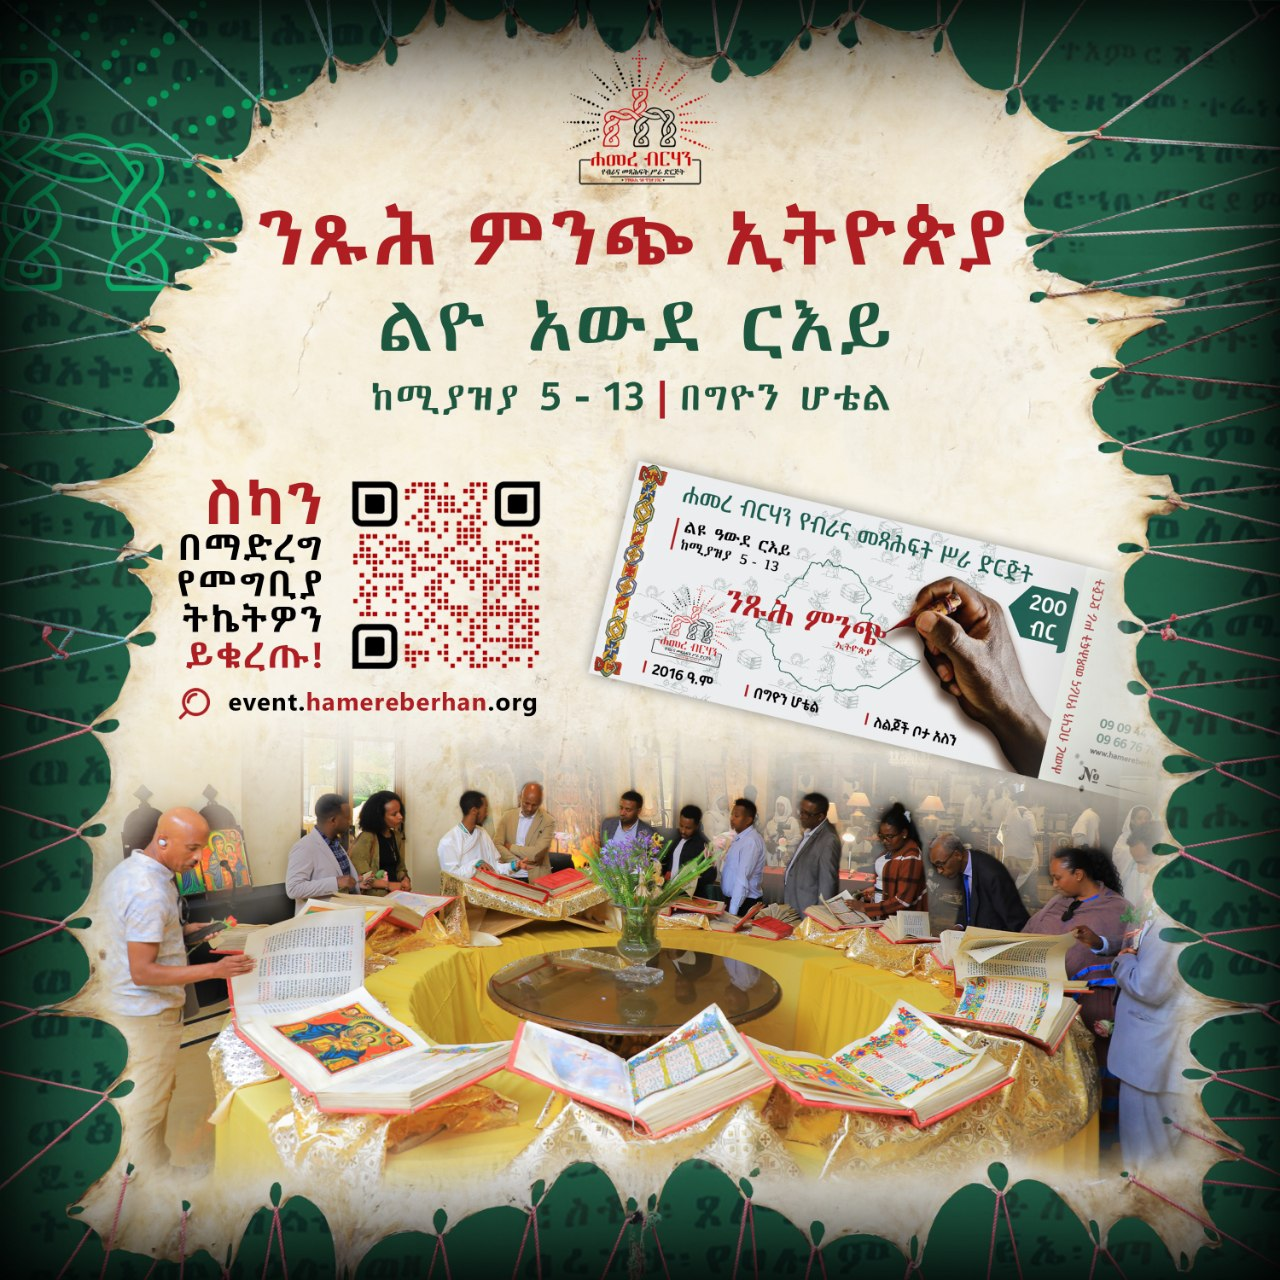

In [53]:
Image(filename='hamere.jpg')

In [23]:
%ls Image


 Volume in drive C has no label.
 Volume Serial Number is 12E4-4A3E

 Directory of C:\Users\Administrator



File Not Found


In [24]:
from pgmpy.factors.discrete import TabularCPD

In [26]:
cpd_qual = TabularCPD(variable='Quality', variable_card=3, values=[[0.3],[0.5],[0.2]])
print(cpd_qual)

+------------+-----+
| Quality(0) | 0.3 |
+------------+-----+
| Quality(1) | 0.5 |
+------------+-----+
| Quality(2) | 0.2 |
+------------+-----+


In [27]:
cpd_qual.variables

['Quality']

In [28]:
cpd_qual.cardinality

array([3])

In [29]:
cpd_qual.values

array([0.3, 0.5, 0.2])

In [54]:
cpd_loc = TabularCPD(variable='hamere', variable_card=2, values=[[0.6],[0.4]])
print(cpd_loc)

+-----------+-----+
| hamere(0) | 0.6 |
+-----------+-----+
| hamere(1) | 0.4 |
+-----------+-----+


In [55]:
cpd_loc.variables
cpd_loc.cardinality


array([2])

Bayesian network

In [30]:
from pgmpy.models import BayesianNetwork
model = BayesianNetwork()

In [31]:
model.add_nodes_from(['rain','traffic_jam'])

In [32]:
model.add_edge('rain','traffic_jam')
model.add_edge('accident','traffic_jam')

In [33]:
model.nodes()

NodeView(('rain', 'traffic_jam', 'accident'))

In [34]:
model.edges()

OutEdgeView([('rain', 'traffic_jam'), ('accident', 'traffic_jam')])

In [35]:
cpd_rain = TabularCPD('rain', 2, [[0.4], [0.6]])
cpd_accident = TabularCPD('accident', 2, [[0.2], [0.8]])
cpd_traffic_jam = TabularCPD('traffic_jam', 2,[[0.9, 0.6, 0.7, 0.1],[0.1, 0.4, 0.3, 0.9]], evidence=['rain', 'accident'],evidence_card=[2, 2])

In [36]:
model.add_cpds(cpd_rain, cpd_accident, cpd_traffic_jam)

In [37]:
model.get_cpds()

[<TabularCPD representing P(rain:2) at 0x19b23068d90>,
 <TabularCPD representing P(accident:2) at 0x19b2304cc50>,
 <TabularCPD representing P(traffic_jam:2 | rain:2, accident:2) at 0x19b2310f8d0>]

In [38]:
model.add_node('long_queues')
model.add_edge('traffic_jam', 'long_queues')
cpd_long_queues = TabularCPD('long_queues', 2,[[0.9, 0.2],[0.1, 0.8]],evidence=['traffic_jam'],evidence_card=[2])

In [39]:
model.add_cpds(cpd_long_queues)
model.add_nodes_from(['getting_up_late', 'late_for_school'])
model.add_edges_from([('getting_up_late', 'late_for_school'),('traffic_jam', 'late_for_school')])

In [40]:
cpd_getting_up_late = TabularCPD('getting_up_late', 2, [[0.6], [0.4]])
cpd_late_for_school = TabularCPD('late_for_school', 2, [[0.9, 0.45, 0.8, 0.1], [0.1, 0.55, 0.2, 0.9]],evidence=['getting_up_late',
'traffic_jam'],evidence_card=[2, 2])

In [41]:
model.add_cpds(cpd_getting_up_late, cpd_late_for_school)
model.get_cpds()

[<TabularCPD representing P(rain:2) at 0x19b23068d90>,
 <TabularCPD representing P(accident:2) at 0x19b2304cc50>,
 <TabularCPD representing P(traffic_jam:2 | rain:2, accident:2) at 0x19b2310f8d0>,
 <TabularCPD representing P(long_queues:2 | traffic_jam:2) at 0x19b2305d710>,
 <TabularCPD representing P(getting_up_late:2) at 0x19b2305c650>,
 <TabularCPD representing P(late_for_school:2 | getting_up_late:2, traffic_jam:2) at 0x19b23114e10>]

In [42]:
model.check_model()

True

INFERENCE

In [43]:
from pgmpy.inference import VariableElimination
infer = VariableElimination(model)
gul_dist = infer.query(['getting_up_late'])
print(gul_dist)

+--------------------+------------------------+
| getting_up_late    |   phi(getting_up_late) |
+====================+========================+
| getting_up_late(0) |                 0.6000 |
+--------------------+------------------------+
| getting_up_late(1) |                 0.4000 |
+--------------------+------------------------+


In [44]:
lfs_dist = infer.query(['late_for_school'])
print(lfs_dist)

+--------------------+------------------------+
| late_for_school    |   phi(late_for_school) |
+====================+========================+
| late_for_school(0) |                 0.5278 |
+--------------------+------------------------+
| late_for_school(1) |                 0.4722 |
+--------------------+------------------------+


In [45]:
lq_dist = infer.query(['long_queues'])
print(lq_dist)

+----------------+--------------------+
| long_queues    |   phi(long_queues) |
+================+====================+
| long_queues(0) |             0.4772 |
+----------------+--------------------+
| long_queues(1) |             0.5228 |
+----------------+--------------------+


lEARNING

In [46]:
import pandas as pd
data = pd.DataFrame(data={'fruit': ["banana", "apple", "banana", "apple", "banana","apple", "banana",
                                    "apple", "apple", "apple", "banana", "banana", "apple", "banana",],
                          'tasty': ["yes", "no", "yes", "yes", "yes", "yes", "yes",
                                    "yes", "yes", "yes", "yes", "no", "no", "no"],
                          'size': ["large", "large", "large", "small", "large", "large", "large",
                                    "small", "large", "large", "large", "large", "small", "small"]})
print(data)

     fruit tasty   size
0   banana   yes  large
1    apple    no  large
2   banana   yes  large
3    apple   yes  small
4   banana   yes  large
5    apple   yes  large
6   banana   yes  large
7    apple   yes  small
8    apple   yes  large
9    apple   yes  large
10  banana   yes  large
11  banana    no  large
12   apple    no  small
13  banana    no  small


In [47]:
model = BayesianNetwork([('fruit', 'tasty'), ('size', 'tasty')])

In [48]:
from pgmpy.estimators import ParameterEstimator
pe = ParameterEstimator(model, data)
print("\n", pe.state_counts('fruit'))  
print("\n", pe.state_counts('tasty')) 


         count
fruit        
apple       7
banana      7

 fruit apple       banana      
size  large small  large small
tasty                         
no      1.0   1.0    1.0   1.0
yes     3.0   2.0    5.0   0.0


In [49]:
from pgmpy.estimators import MaximumLikelihoodEstimator
mle = MaximumLikelihoodEstimator(model, data)
print(mle.estimate_cpd('fruit'))  
print(mle.estimate_cpd('tasty'))

+---------------+-----+
| fruit(apple)  | 0.5 |
+---------------+-----+
| fruit(banana) | 0.5 |
+---------------+-----+
+------------+--------------+-----+---------------+
| fruit      | fruit(apple) | ... | fruit(banana) |
+------------+--------------+-----+---------------+
| size       | size(large)  | ... | size(small)   |
+------------+--------------+-----+---------------+
| tasty(no)  | 0.25         | ... | 1.0           |
+------------+--------------+-----+---------------+
| tasty(yes) | 0.75         | ... | 0.0           |
+------------+--------------+-----+---------------+


In [52]:
model.fit(data, estimator=MaximumLikelihoodEstimator)